#Preliminary operations

##Import libraries

In [1]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# stats
from scipy import stats
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS
# evaluation
from sklearn.metrics import silhouette_score
# distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram
# Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score

##Mount Google Drive

In [3]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import datasets

In [4]:
# import dataframe (without outliers)
df = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Data Understanding & Preparation/Data prepared final/df_prep_final.xlsx", index_col="Unnamed: 0").sort_values("emotion")
df_emph_high = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Data Understanding & Preparation/Data prepared final/df_prep_final_emph_high.xlsx", index_col="Unnamed: 0").sort_values("emotion")
df_emph_low = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Data Understanding & Preparation/Data prepared final/df_prep_final_emph_low.xlsx", index_col="Unnamed: 0").sort_values("emotion")

In [5]:
# get data columns
df_data = df[["stft_mean", "mfcc_mean", "skew"]]
df_data_emph_high = df_emph_high[["stft_mean", "mfcc_mean", "skew"]]
df_data_emph_low = df_emph_low[["stft_mean", "mfcc_mean", "skew"]]

# get values from data columns
X = df_data.values
X_emph_high = df_data_emph_high.values
X_emph_low = df_data_emph_low.values

# get emotion lables from each emphasis group
y_emotion = df["emotion"]
y_emotion_emph_high = df_emph_high["emotion"]
y_emotion_emph_low = df_emph_low["emotion"]

# get emotion type from each emphasis group
y_emtype = df["emotion_type"]
y_emtype_emph_high = df_emph_high["emotion_type"]
y_emtype_emph_low = df_emph_low["emotion_type"]

##Normalization

In [6]:
# get StandardScaler
std_scaler = StandardScaler()

# normalise each emphasis group with StandardScaler
X_std = std_scaler.fit_transform(X)
X_std_emph_high = std_scaler.fit_transform(X_emph_high)
X_std_emph_low = std_scaler.fit_transform(X_emph_low)

# get MinMaxScaler
mima_scaler = MinMaxScaler()

# normalise each emphasis group with MinMaxScaler
X_mima = mima_scaler.fit_transform(X)
X_mima_emph_high = mima_scaler.fit_transform(X_emph_high)
X_mima_emph_low = mima_scaler.fit_transform(X_emph_low)

#DBSCAN

##Parameters tuning

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
eps_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [ ]:
dbscan_tuning_ncluster = np.zeros((10, 10))
i = -1
for eps in eps_list:
  j = 0
  i += 1
  for min_s in range(1, 11, 1):
    dbscan = DBSCAN(eps=eps, min_samples=min_s)
    dbscan.fit(X_std)
    dbscan_tuning_ncluster[j][i] = len(np.unique(dbscan.labels_))
    j += 1
print(eps_list)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [ ]:
dbscan_tuning_silhouette = np.zeros((10, 10))
i = -1
for eps in eps_list:
  j = 0
  i += 1
  for min_s in range(1, 11, 1):
    dbscan = DBSCAN(eps=eps, min_samples=min_s)
    dbscan.fit(X_std)
    if len(np.unique(dbscan.labels_)) > 1:
      dbscan_tuning_silhouette[j][i] = silhouette_score(X_std, dbscan.labels_, random_state=1)
    else:
      dbscan_tuning_silhouette[j][i] = -1.0
    j += 1
print(eps_list)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


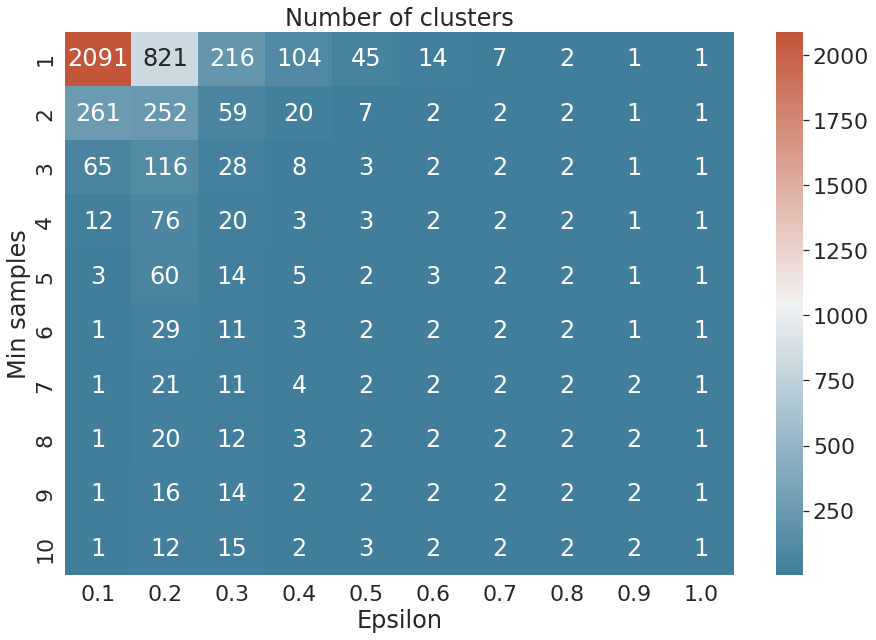

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(font_scale=2)
sns.heatmap(
    dbscan_tuning_ncluster,
    cmap=cmap, 
    annot=True, 
    fmt=".0f", 
    yticklabels=range(1, 11, 1), 
    xticklabels=eps_list
    )
plt.xlabel("Epsilon")
plt.ylabel("Min samples")
plt.title("Number of clusters")
plt.savefig("ncluster_tuning_dbscan.svg", format="svg")

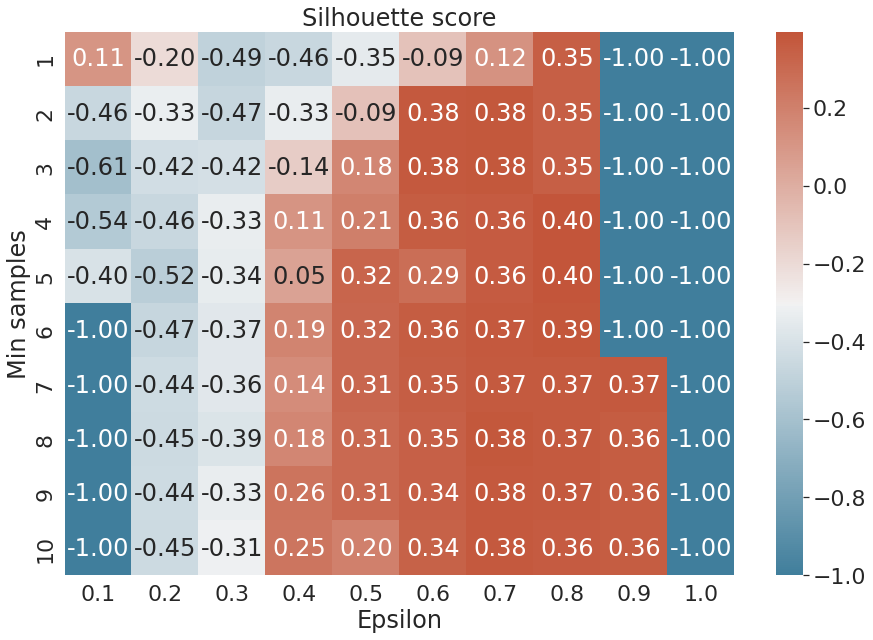

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(font_scale=2)

sns.heatmap(
    dbscan_tuning_silhouette, 
    cmap=cmap, 
    annot=True, 
    fmt=".2f", 
    yticklabels=range(1, 11, 1), 
    xticklabels=eps_list
    )
plt.xlabel("Epsilon")
plt.ylabel("Min samples")
plt.title("Silhouette score")
plt.savefig("silhouette_tuning_dbscan.svg", format="svg")

## All emphasis

In [7]:
# get dbscan
dbscan = DBSCAN(eps=0.8, min_samples=4)
# fit DBSCAN
dbscan.fit(X_std)

DBSCAN(eps=0.8, min_samples=4)

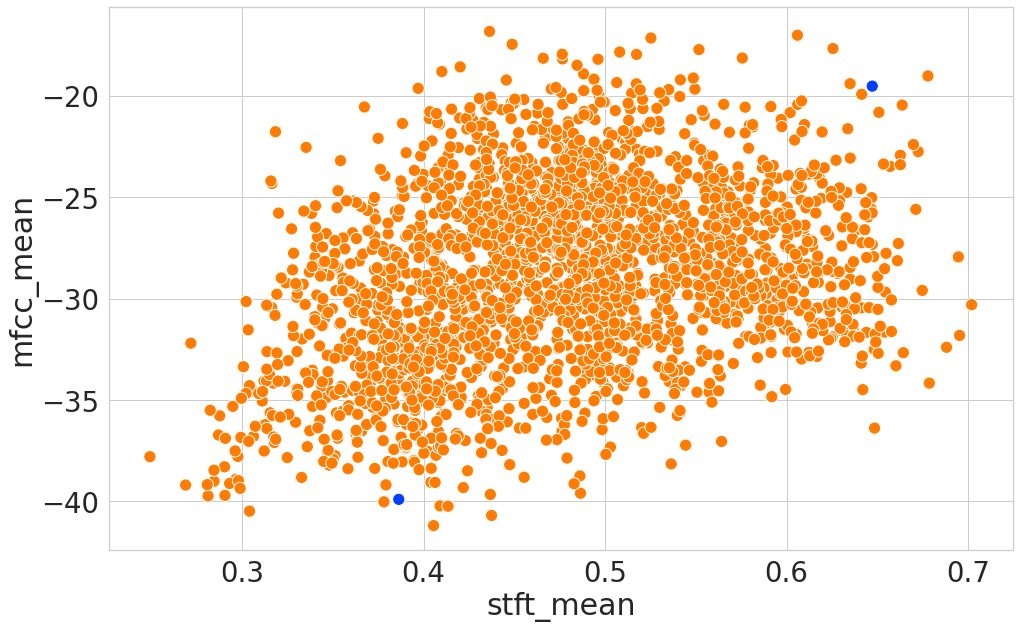

In [8]:
# Set figure size with matplotlib
plt.figure(figsize=(16.2,10))
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
# Create plot
sns.scatterplot(
    data=df, 
    x="stft_mean", 
    y="mfcc_mean", 
    hue=dbscan.labels_,
    palette="bright",
    marker="o",
    s=150,
    legend=False
)
plt.savefig("dbscan_all.svg", format="svg")
# Set title with matplotlib

In [9]:
df_data['dbscan_labels'] = dbscan.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df_data.groupby("dbscan_labels").count()

stft_mean  mfcc_mean  skew
dbscan_labels                            
-1                     2          2     2
 0                  2450       2450  2450

In [ ]:
print(silhouette_score(X_std, dbscan.labels_))

0.3953947983753981


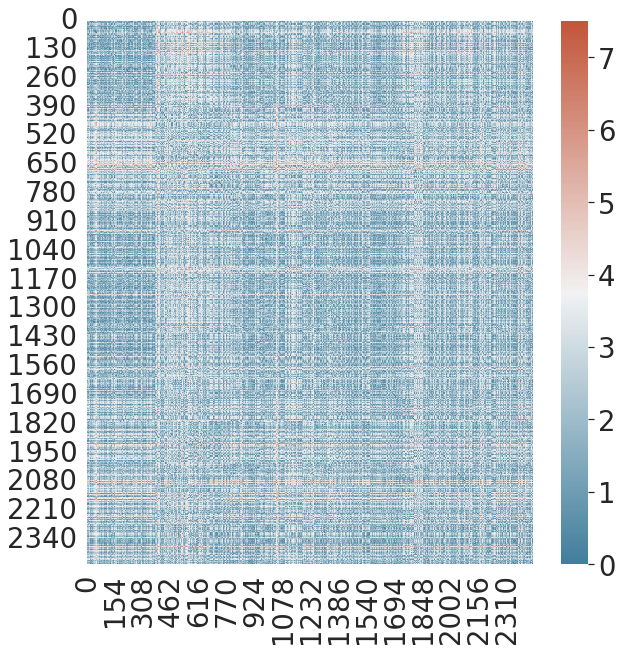

In [ ]:
dist = pdist(X_std, 'euclidean')
plt.figure(figsize=(10,10))
dist = squareform(dist)
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(dist, annot=False, cmap=cmap)
plt.show()

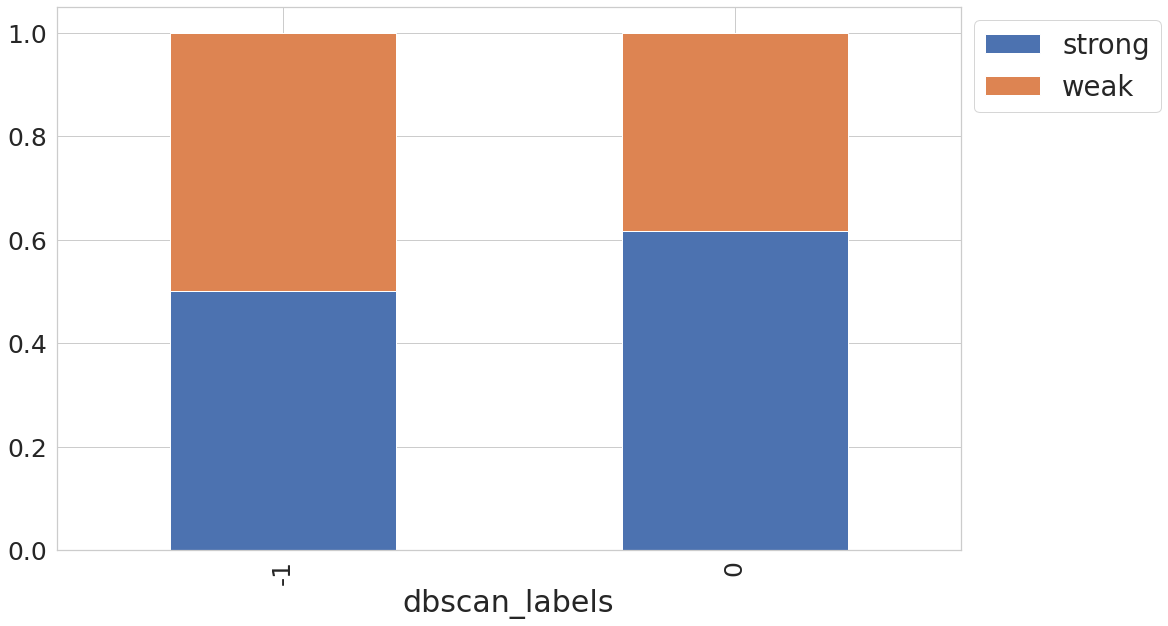

In [ ]:
bar_pl = y_emtype.groupby(df_data['dbscan_labels']).value_counts(normalize=True).unstack(1)

bar_pl[0:5].plot(kind='bar', stacked=True, edgecolor='white', fontsize=25, figsize=(16.2,10))
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("emtype_dbscan_all.svg", format="svg")
plt.show()

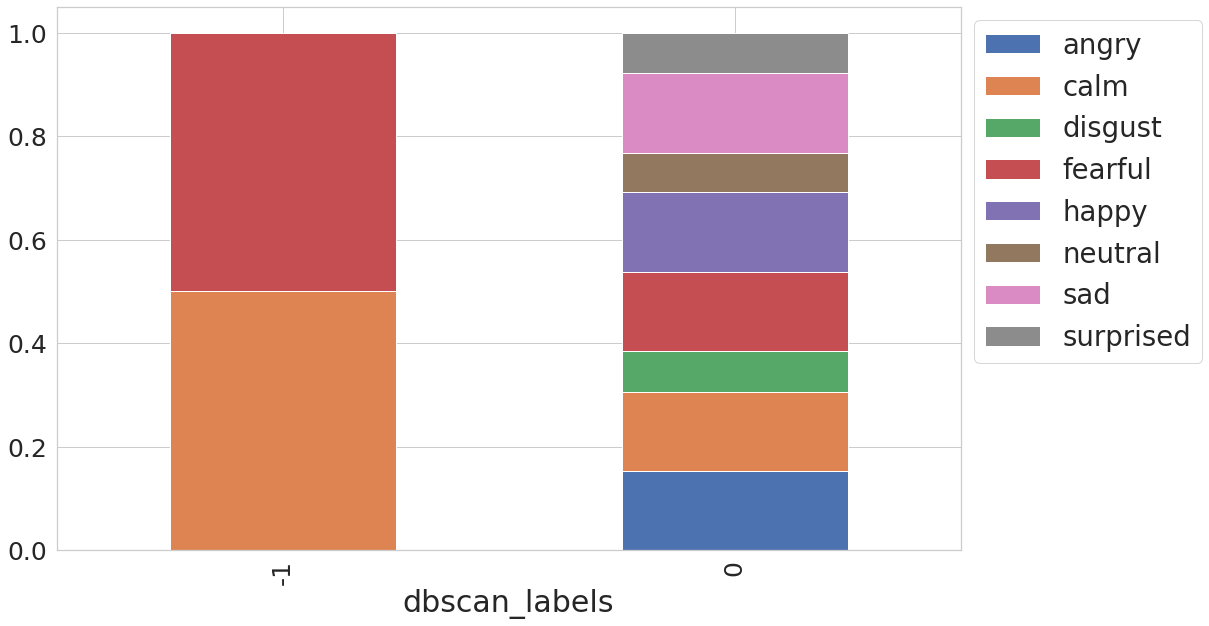

In [ ]:
bar_pl = y_emotion.groupby(df_data['dbscan_labels']).value_counts(normalize=True).unstack(1)
bar_pl[0:5].plot(kind='bar', stacked=True, edgecolor='white', fontsize=25, figsize=(16.2,10))

plt.legend(bbox_to_anchor=(1,1))
plt.savefig("emotions_dbscan_all.svg", format="svg")
plt.show()

## High emphasis

In [ ]:
# get dbscan
dbscan = DBSCAN(eps=0.8, min_samples=4)
# fit DBSCAN
dbscan.fit(X_std_emph_high)

DBSCAN(eps=0.8, min_samples=4)

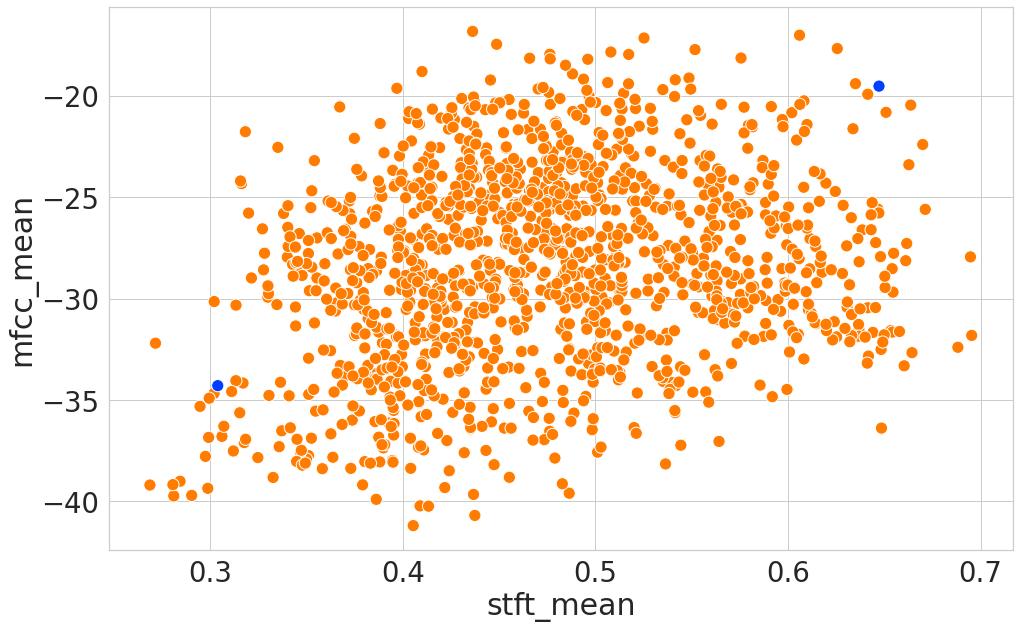

In [ ]:
# Set figure size with matplotlib
plt.figure(figsize=(16.2,10))
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
# Create plot
sns.scatterplot(
    data=df_emph_high, 
    x="stft_mean", 
    y="mfcc_mean", 
    hue=dbscan.labels_,
    palette="bright",
    marker="o",
    s=150,
    legend=False
)
# Set title with matplotlib

plt.savefig("dbscan_emph_high.svg", format="svg")


In [ ]:
df_data_emph_high['dbscan_labels'] = dbscan.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_data_emph_high.groupby("dbscan_labels").count()

stft_mean  mfcc_mean  skew
dbscan_labels                            
-1                     2          2     2
 0                  1316       1316  1316

In [ ]:
print(silhouette_score(X_std_emph_high, dbscan.labels_))

0.3421632540440766


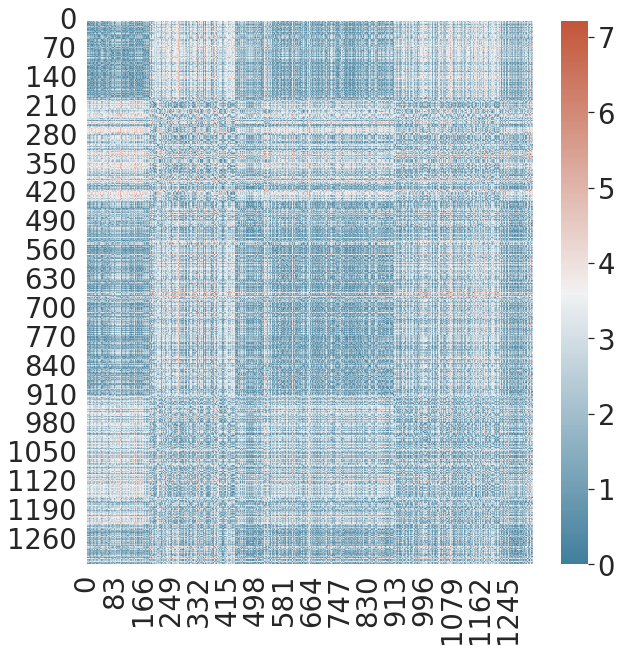

In [ ]:
dist = pdist(X_std_emph_high, 'euclidean')
plt.figure(figsize=(10,10))
dist = squareform(dist)
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(dist, annot=False, cmap=cmap)
plt.show()

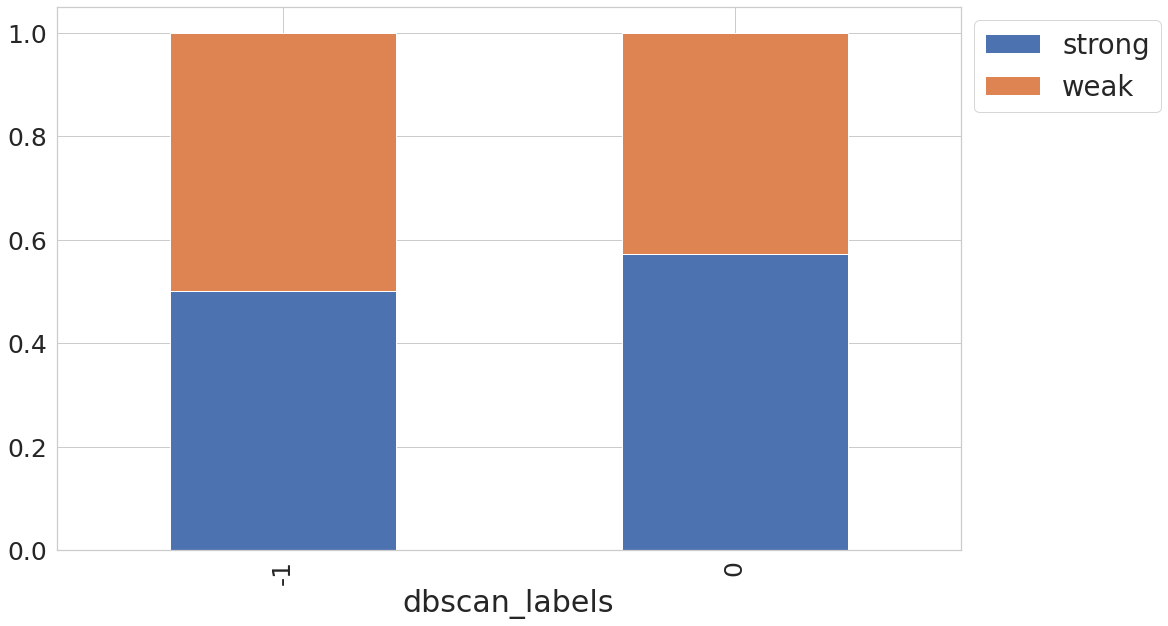

In [ ]:
bar_pl = y_emtype_emph_high.groupby(df_data_emph_high['dbscan_labels']).value_counts(normalize=True).unstack(1)

bar_pl[0:5].plot(kind='bar', stacked=True, edgecolor='white', fontsize=25, figsize=(16.2,10))
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("emtype_dbscan_emph_high.svg", format="svg")
plt.show()

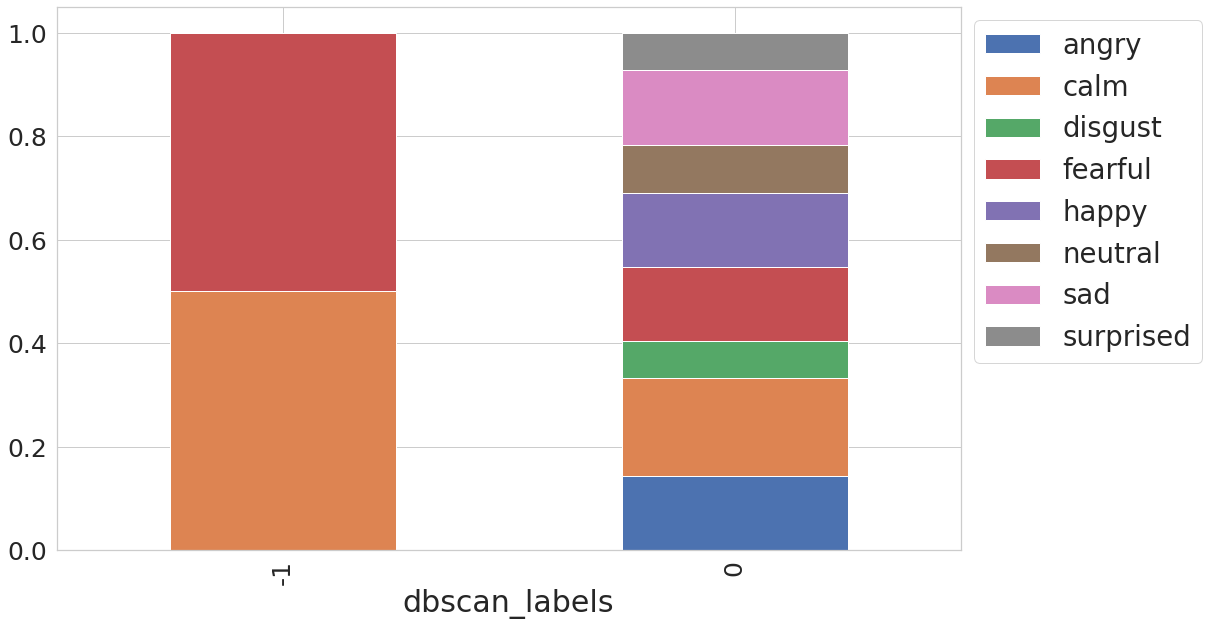

In [ ]:
bar_pl = y_emotion_emph_high.groupby(df_data_emph_high['dbscan_labels']).value_counts(normalize=True).unstack(1)

bar_pl[0:5].plot(kind='bar', stacked=True, edgecolor='white', fontsize=25, figsize=(16.2,10))
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("emotions_dbscan_emph_high.svg", format="svg")
plt.show()

## Low emphasis

In [ ]:
# get dbscan
dbscan = DBSCAN(eps=0.8, min_samples=4)
# fit DBSCAN
dbscan.fit(X_std_emph_low)

DBSCAN(eps=0.8, min_samples=4)

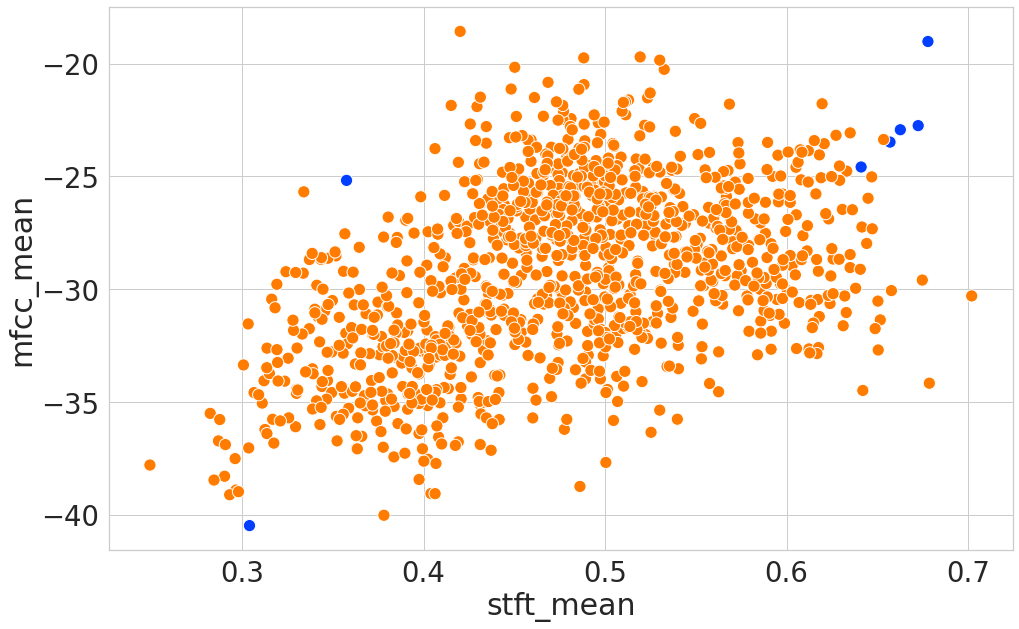

In [ ]:
# Set figure size with matplotlib
plt.figure(figsize=(16.2,10))
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
# Create plot
sns.scatterplot(
    data=df_emph_low, 
    x="stft_mean", 
    y="mfcc_mean", 
    hue=dbscan.labels_,
    palette="bright",
    marker="o",
    s=150,
    legend=False
)
# Set title with matplotlib

plt.savefig("dbscan_emph_low.svg", format="svg")


In [ ]:
df_data_emph_low['dbscan_labels'] = dbscan.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_data_emph_low.groupby("dbscan_labels").count()

stft_mean  mfcc_mean  skew
dbscan_labels                            
-1                     7          7     7
 0                  1127       1127  1127

In [ ]:
print(silhouette_score(X_std_emph_low, dbscan.labels_))

0.405773004179787


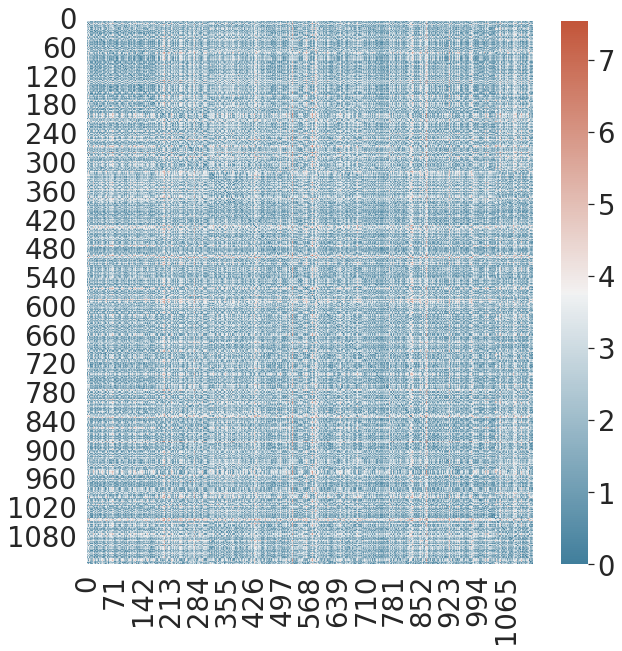

In [ ]:
dist = pdist(X_std_emph_low, 'euclidean')
plt.figure(figsize=(10,10))
dist = squareform(dist)
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(dist, annot=False, cmap=cmap)
plt.show()

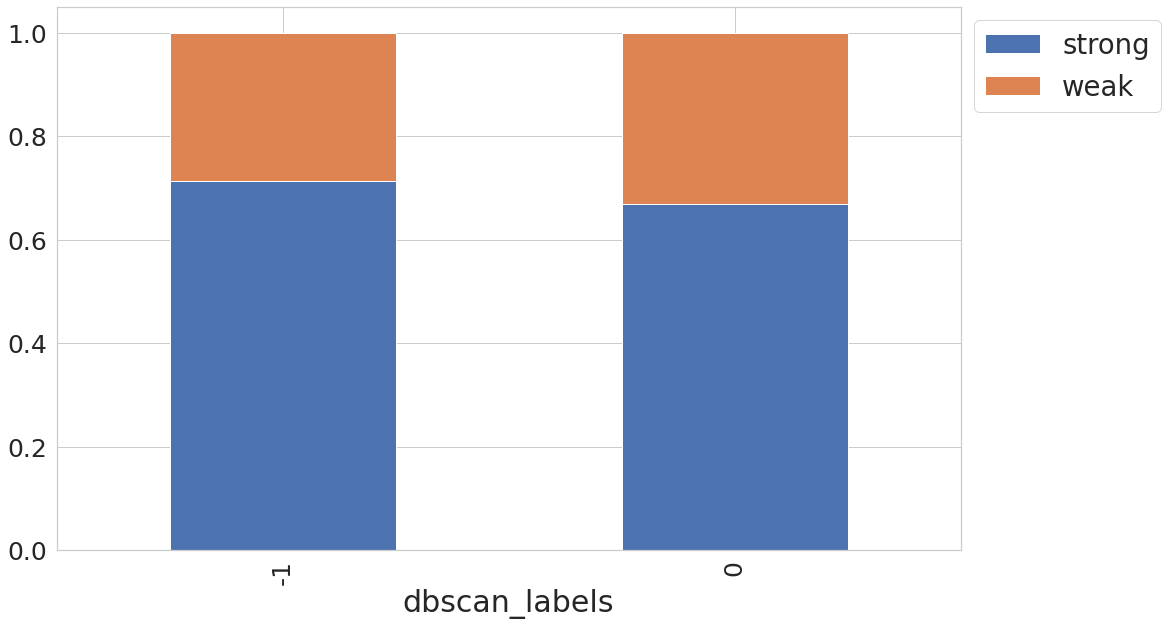

In [ ]:
bar_pl = y_emtype_emph_low.groupby(df_data_emph_low['dbscan_labels']).value_counts(normalize=True).unstack(1)

bar_pl[0:5].plot(kind='bar', stacked=True, edgecolor='white', fontsize=25, figsize=(16.2,10))
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("emtype_dbscan_emph_low.svg", format="svg")
plt.show()

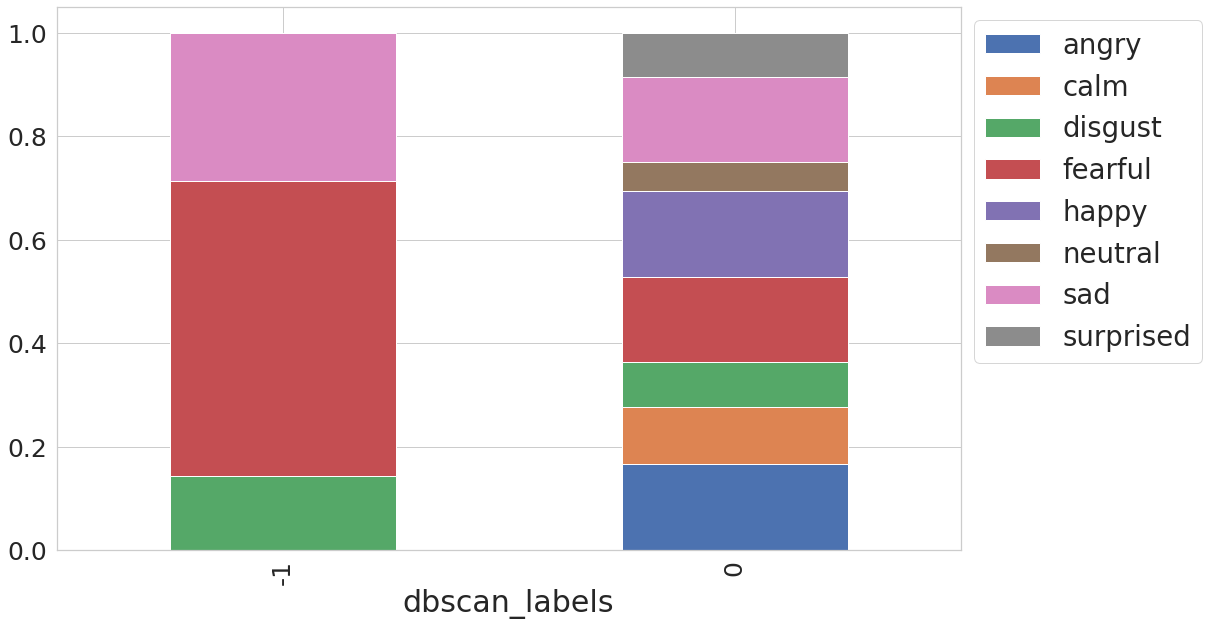

In [ ]:
bar_pl = y_emotion_emph_low.groupby(df_data_emph_low['dbscan_labels']).value_counts(normalize=True).unstack(1)
bar_pl[0:5].plot(kind='bar', stacked=True, edgecolor='white', fontsize=25, figsize=(16.2,10))

plt.legend(bbox_to_anchor=(1,1))
plt.savefig("emotions_dbscan_emph_low.svg", format="svg")
plt.show()

#OPTICS

##Parameters tuning

In [ ]:
optics_tuning_ncluster = np.zeros((10, 10))
i = -1
for eps in eps_list:
  j = 0
  i += 1
  for min_s in range(1, 11, 1):
    optics = OPTICS(eps=eps, min_samples=min_s, cluster_method="dbscan")
    optics.fit(X_std)
    optics_tuning_ncluster[j][i] = len(np.unique(optics.labels_))
    j += 1
print(eps_list)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [ ]:
optics_tuning_silhouette = np.zeros((10, 10))
i = -1
for eps in eps_list:
  j = 0
  i += 1
  for min_s in range(1, 11, 1):
    optics = OPTICS(eps=eps, min_samples=min_s, cluster_method="dbscan")
    optics.fit(X_std)
    if len(np.unique(optics.labels_)) > 1:
      optics_tuning_silhouette[j][i] = silhouette_score(X_std, optics.labels_, random_state=1)
    else:
      optics_tuning_silhouette[j][i] = -1.0
    j += 1
print(eps_list)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


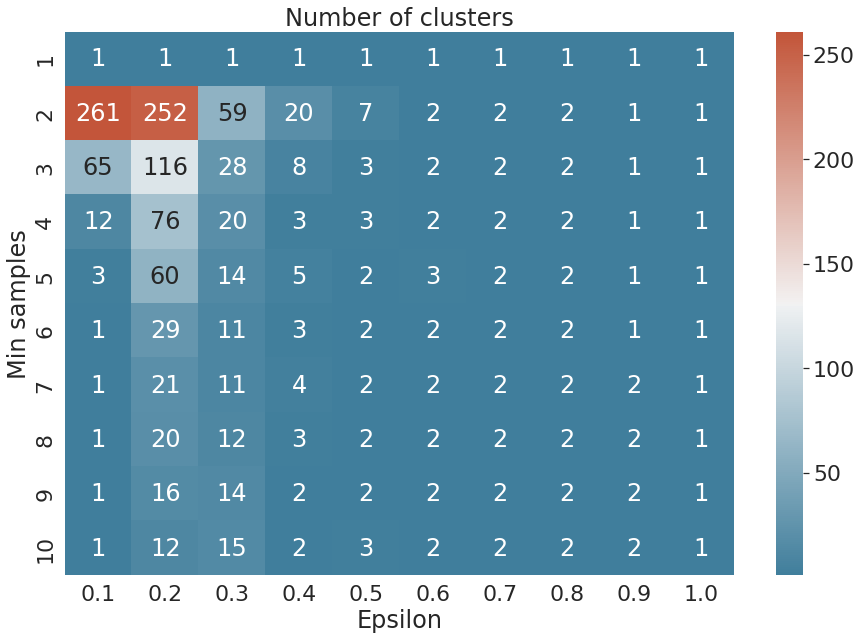

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(font_scale=2)
sns.heatmap(
    optics_tuning_ncluster, 
    cmap=cmap, 
    annot=True, 
    fmt=".0f", 
    yticklabels=range(1, 11, 1), 
    xticklabels=eps_list
    )
plt.xlabel("Epsilon")
plt.ylabel("Min samples")
plt.title("Number of clusters")
plt.savefig("ncluster_tuning_optics.svg", format="svg")

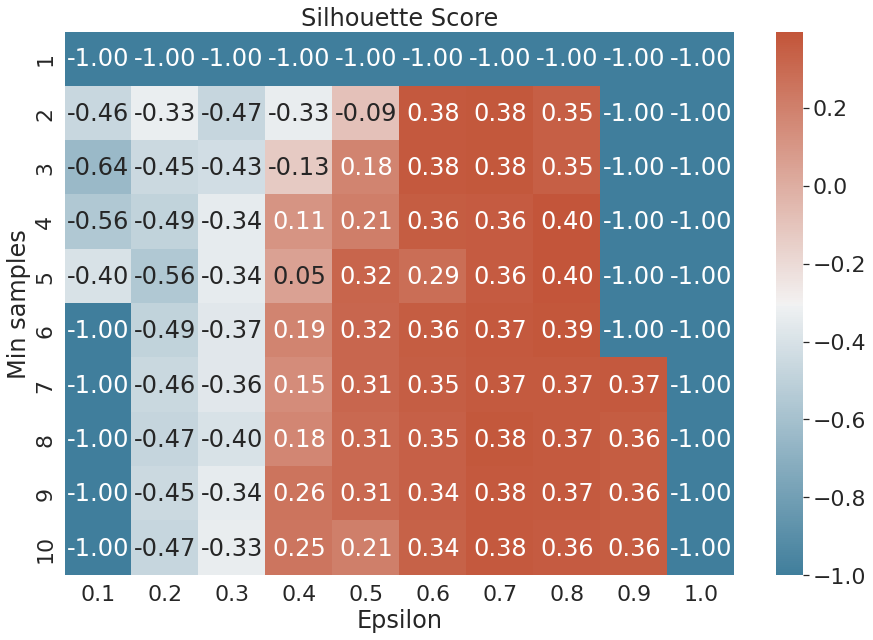

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(font_scale=2)
sns.heatmap(
    optics_tuning_silhouette, 
    cmap=cmap, 
    annot=True, 
    fmt=".2f", 
    yticklabels=range(1, 11, 1), 
    xticklabels=eps_list
    )
plt.xlabel("Epsilon")
plt.ylabel("Min samples")
plt.title("Silhouette Score")
plt.savefig("silhouette_tuning_optics.svg", format="svg")

## All emphasis

In [ ]:
# get dbscan
optics = OPTICS(min_samples=4)
# fit DBSCAN
optics.fit(X_std)

OPTICS(min_samples=4)

In [ ]:
silhouette_score(X_std, optics.labels_, random_state=1)

-0.33190302987955

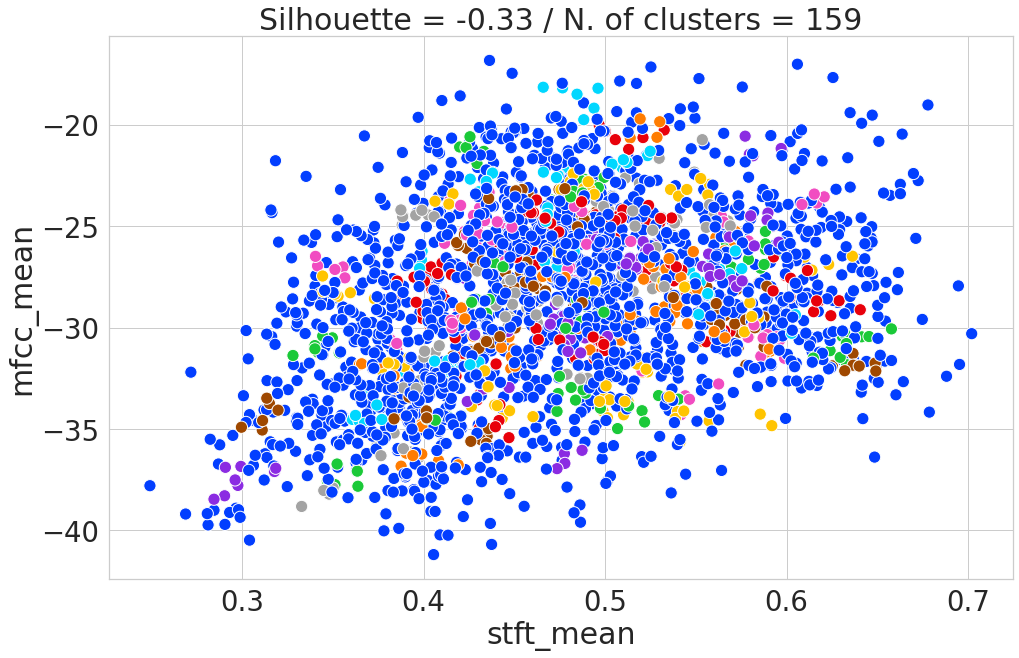

In [ ]:
# Set figure size with matplotlib
plt.figure(figsize=(16.2,10))
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
# Create plot
sns.scatterplot(
    data=df, 
    x="stft_mean", 
    y="mfcc_mean", 
    hue=optics.labels_,
    palette="bright",
    marker="o",
    s=150,
    legend=False
)
# Set title with matplotlib
plt.title("Silhouette = -0.33 / N. of clusters = 159")
plt.savefig("optics_all.svg", format="svg")


In [ ]:
df_data['optics_labels'] = optics.labels_
df_data.groupby("optics_labels").count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


stft_mean  mfcc_mean  skew
optics_labels                            
-1                  1536       1536  1536
 0                    12         12    12
 1                     5          5     5
 2                     7          7     7
 3                     7          7     7
...                  ...        ...   ...
 153                   4          4     4
 154                   4          4     4
 155                   4          4     4
 156                   6          6     6
 157                  12         12    12

[159 rows x 3 columns]

In [ ]:
# get dbscan
optics = OPTICS(min_samples=4, eps=0.8, cluster_method="dbscan")
# fit DBSCAN
optics.fit(X_std)

OPTICS(cluster_method='dbscan', eps=0.8, min_samples=4)

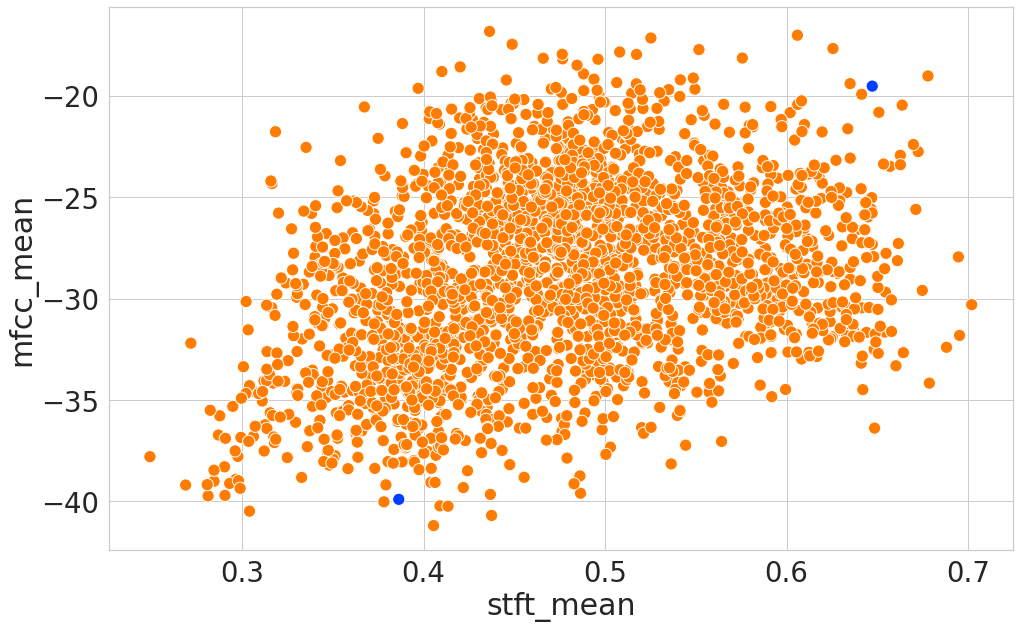

In [ ]:
# Set figure size with matplotlib
plt.figure(figsize=(16.2,10))
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
# Create plot
sns.scatterplot(
    data=df, 
    x="stft_mean", 
    y="mfcc_mean", 
    hue=optics.labels_,
    palette="bright",
    marker="o",
    s=150,
    legend=False
)
# Set title with matplotlib

plt.savefig("optics_all.svg", format="svg")


In [ ]:
df_data['optics_labels'] = optics.labels_
df_data.groupby("optics_labels").count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


stft_mean  mfcc_mean  skew  dbscan_labels
optics_labels                                           
-1                  1536       1536  1536           1536
 0                    12         12    12             12
 1                     5          5     5              5
 2                     7          7     7              7
 3                     7          7     7              7
...                  ...        ...   ...            ...
 153                   4          4     4              4
 154                   4          4     4              4
 155                   4          4     4              4
 156                   6          6     6              6
 157                  12         12    12             12

[159 rows x 4 columns]

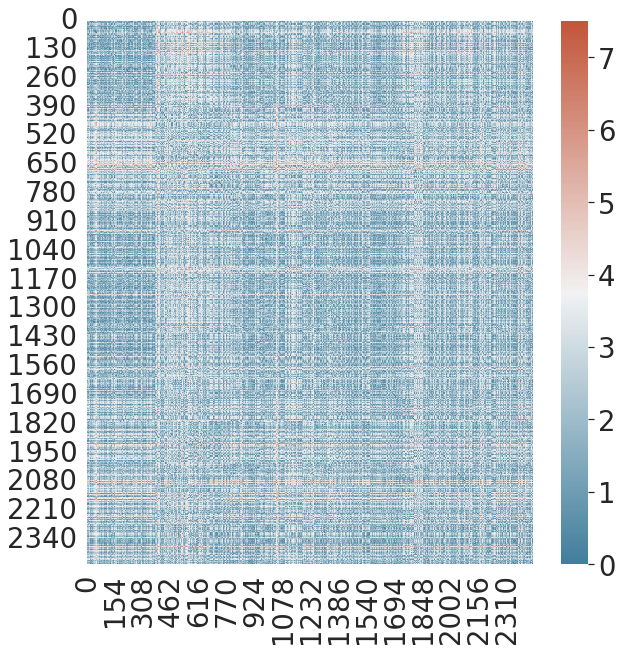

In [ ]:
dist = pdist(X_std, 'euclidean')

dist = squareform(dist)
plt.figure(figsize=(10,10))
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(dist, annot=False, cmap=cmap)
plt.show()

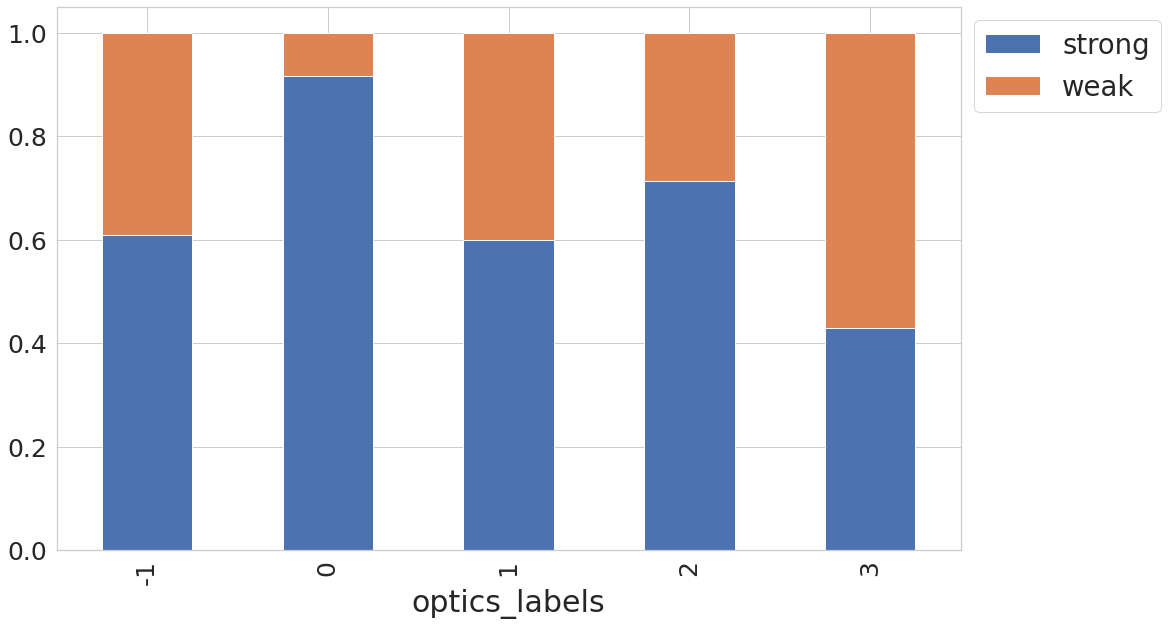

In [ ]:
bar_pl = y_emtype.groupby(df_data['optics_labels']).value_counts(normalize=True).unstack(1)

bar_pl[0:5].plot(kind='bar', stacked=True, edgecolor='white', fontsize=25, figsize=(16.2,10))
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("emtype_optics_all.svg", format="svg")
plt.show()

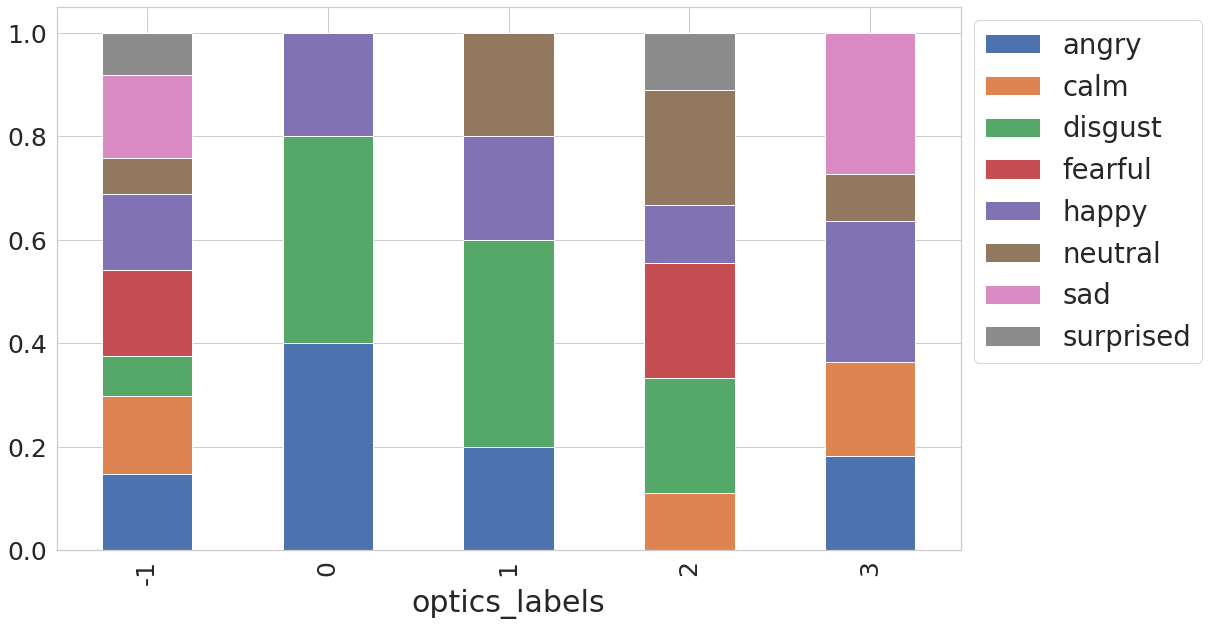

In [ ]:
bar_pl = y_emotion.groupby(df_data['optics_labels']).value_counts(normalize=True).unstack(1)
bar_pl[0:5].plot(kind='bar', stacked=True, edgecolor='white', fontsize=25, figsize=(16.2,10))

plt.legend(bbox_to_anchor=(1,1))
plt.savefig("emotions_optics_all.svg", format="svg")
plt.show()

## High emphasis

In [ ]:
# get dbscan
optics = OPTICS()
# fit DBSCAN
optics.fit(X_std_emph_high)

OPTICS(eps=0.3)

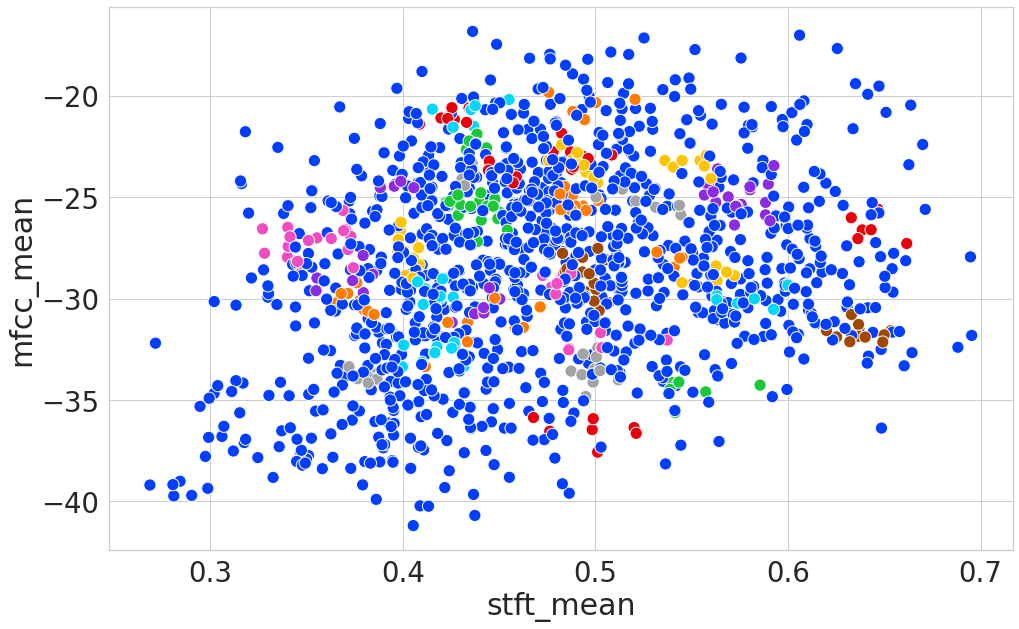

In [ ]:
# Set figure size with matplotlib
plt.figure(figsize=(16.2,10))
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
# Create plot
sns.scatterplot(
    data=df_emph_high, 
    x="stft_mean", 
    y="mfcc_mean", 
    hue=optics.labels_,
    palette="bright",
    marker="o",
    s=150,
    legend=False
)
# Set title with matplotlib


plt.savefig("optics_emph_high.svg", format="svg")

In [ ]:
df_data_emph_high['optics_labels'] = optics.labels_
df_data_emph_high.groupby("optics_labels").count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


stft_mean  mfcc_mean  skew  dbscan_labels
optics_labels                                           
-1                  1003       1003  1003           1003
 0                    10         10    10             10
 1                     6          6     6              6
 2                     5          5     5              5
 3                     5          5     5              5
 4                     6          6     6              6
 5                     8          8     8              8
 6                     6          6     6              6
 7                    11         11    11             11
 8                     7          7     7              7
 9                     7          7     7              7
 10                    9          9     9              9
 11                    5          5     5              5
 12                   10         10    10             10
 13                    6          6     6              6
 14                    5          5     5              5
 15                    7          7     7              7
 16                    5          5     5              5
 17                    9          9     9              9
 18                    8          8     8              8
 19                    5          5     5              5
 20                    5          5     5              5
 21                    5          5     5              5
 22                    7          7     7              7
 23                    6          6     6              6
 24                    6          6     6              6
 25                   10         10    10             10
 26                    7          7     7              7
 27                    5          5     5              5
 28                    7          7     7              7
 29                    6          6     6              6
 30                    6          6     6              6
 31                    7          7     7              7
 32                    6          6     6              6
 33                   11         11    11             11
 34                   11         11    11             11
 35                    7          7     7              7
 36                   11         11    11             11
 37                    7          7     7              7
 38                    6          6     6              6
 39                   10         10    10             10
 40                   10         10    10             10
 41                    6          6     6              6
 42                    7          7     7              7
 43                    6          6     6              6

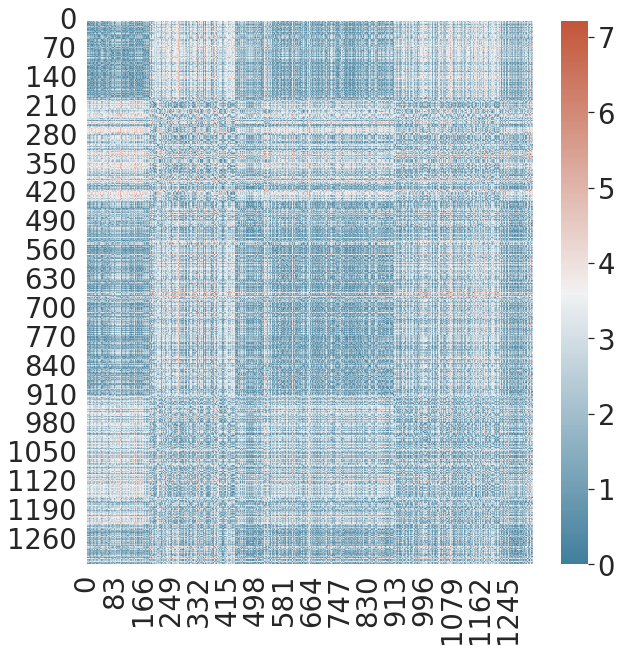

In [ ]:
dist = pdist(X_std_emph_high, 'euclidean')
plt.figure(figsize=(10,10))
dist = squareform(dist)
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(dist, annot=False, cmap=cmap)
plt.show()

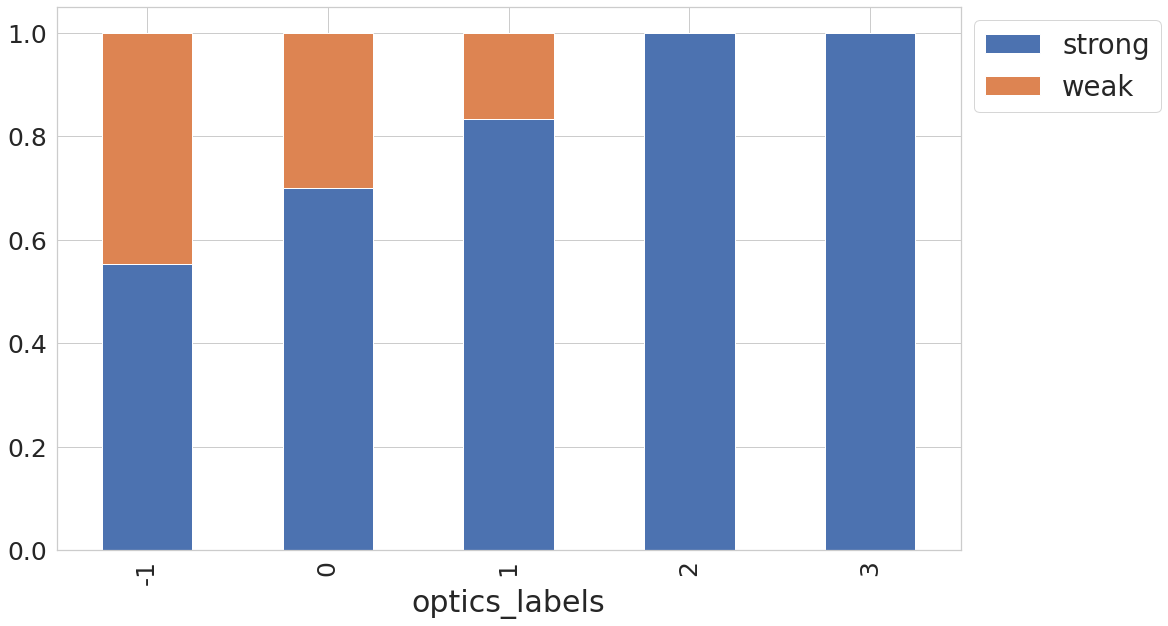

In [ ]:
bar_pl = y_emtype_emph_high.groupby(df_data_emph_high['optics_labels']).value_counts(normalize=True).unstack(1)

bar_pl[0:5].plot(kind='bar', stacked=True, edgecolor='white', fontsize=25, figsize=(16.2,10))
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("emtype_optics_emph_high.svg", format="svg")
plt.show()

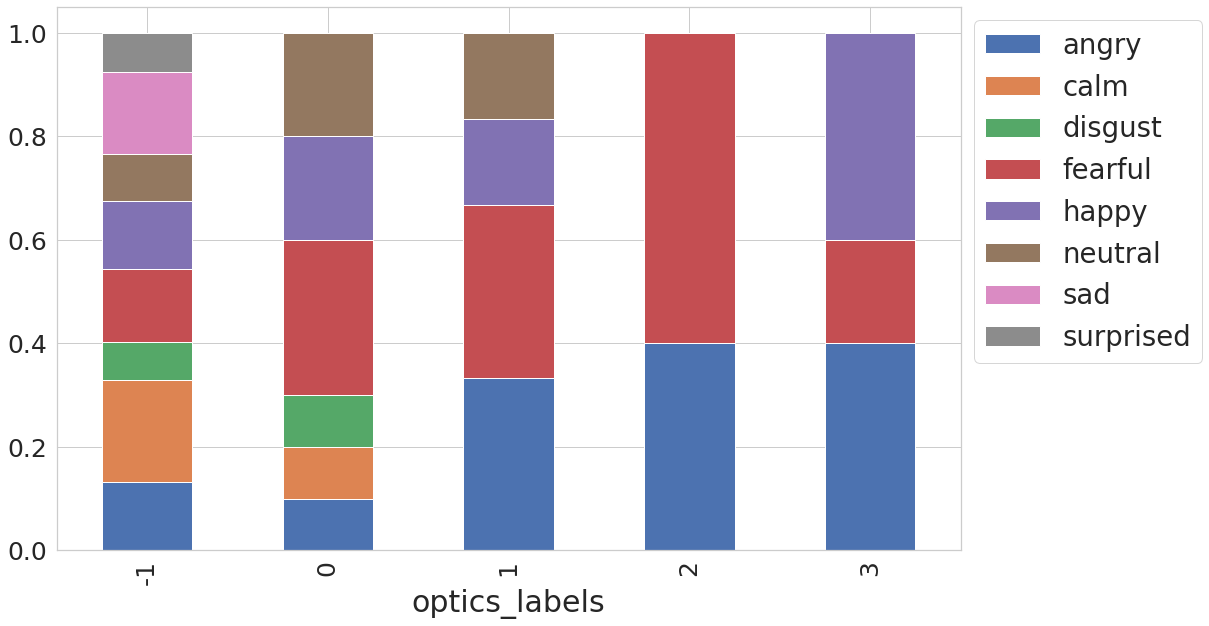

In [ ]:
bar_pl = y_emotion_emph_high.groupby(df_data_emph_high['optics_labels']).value_counts(normalize=True).unstack(1)

bar_pl[0:5].plot(kind='bar', stacked=True, edgecolor='white', fontsize=25, figsize=(16.2,10))
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("emotions_optics_emph_high.svg", format="svg")
plt.show()

## Low emphasis

In [ ]:
# get dbscan
optics = OPTICS()
# fit DBSCAN
optics.fit(X_std_emph_low)

OPTICS(min_samples=6)

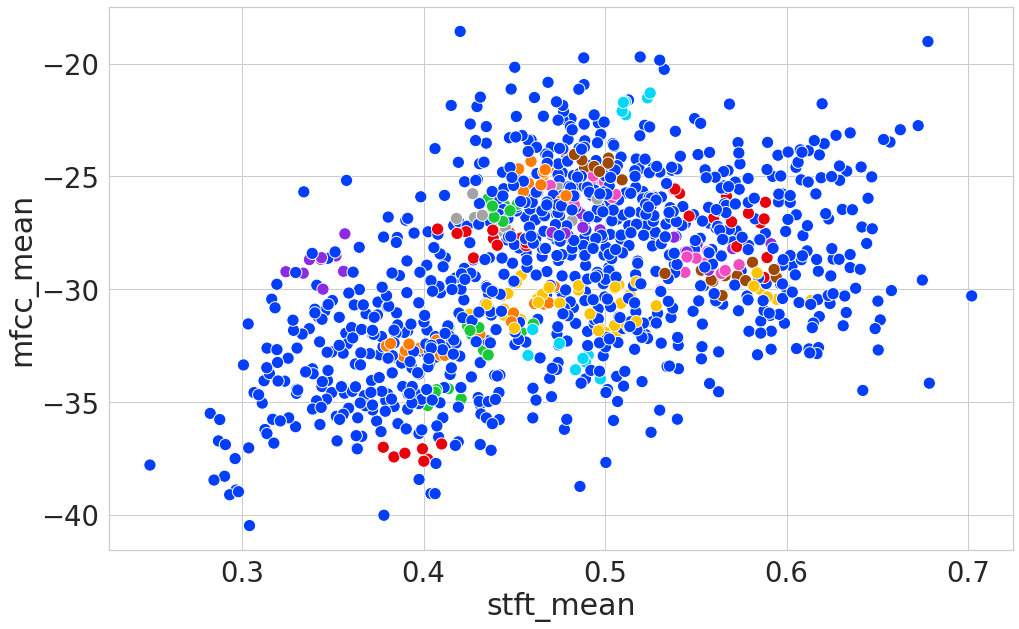

In [ ]:
# Set figure size with matplotlib
plt.figure(figsize=(16.2,10))
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
# Create plot
sns.scatterplot(
    data=df_emph_low, 
    x="stft_mean", 
    y="mfcc_mean", 
    hue=optics.labels_,
    palette="bright",
    marker="o",
    s=150,
    legend=False
)
# Set title with matplotlib

plt.savefig("optics_emph_low.svg", format="svg")

In [ ]:
df_data_emph_low['optics_labels'] = optics.labels_
df_data_emph_low.groupby("optics_labels").count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


stft_mean  mfcc_mean  skew  dbscan_labels
optics_labels                                           
-1                   898        898   898            898
 0                    11         11    11             11
 1                     9          9     9              9
 2                    11         11    11             11
 3                     7          7     7              7
 4                     9          9     9              9
 5                    12         12    12             12
 6                     7          7     7              7
 7                    37         37    37             37
 8                     8          8     8              8
 9                     6          6     6              6
 10                   11         11    11             11
 11                    7          7     7              7
 12                    7          7     7              7
 13                    9          9     9              9
 14                   11         11    11             11
 15                   10         10    10             10
 16                    6          6     6              6
 17                    7          7     7              7
 18                    6          6     6              6
 19                    7          7     7              7
 20                    8          8     8              8
 21                   10         10    10             10
 22                   14         14    14             14
 23                    6          6     6              6

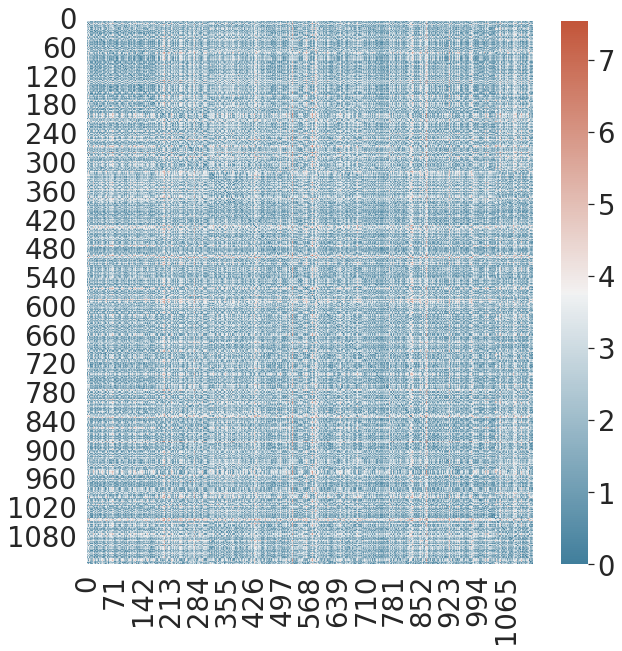

In [ ]:
dist = pdist(X_std_emph_low, 'euclidean')
plt.figure(figsize=(10,10))
dist = squareform(dist)
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(dist, annot=False, cmap=cmap)
plt.show()

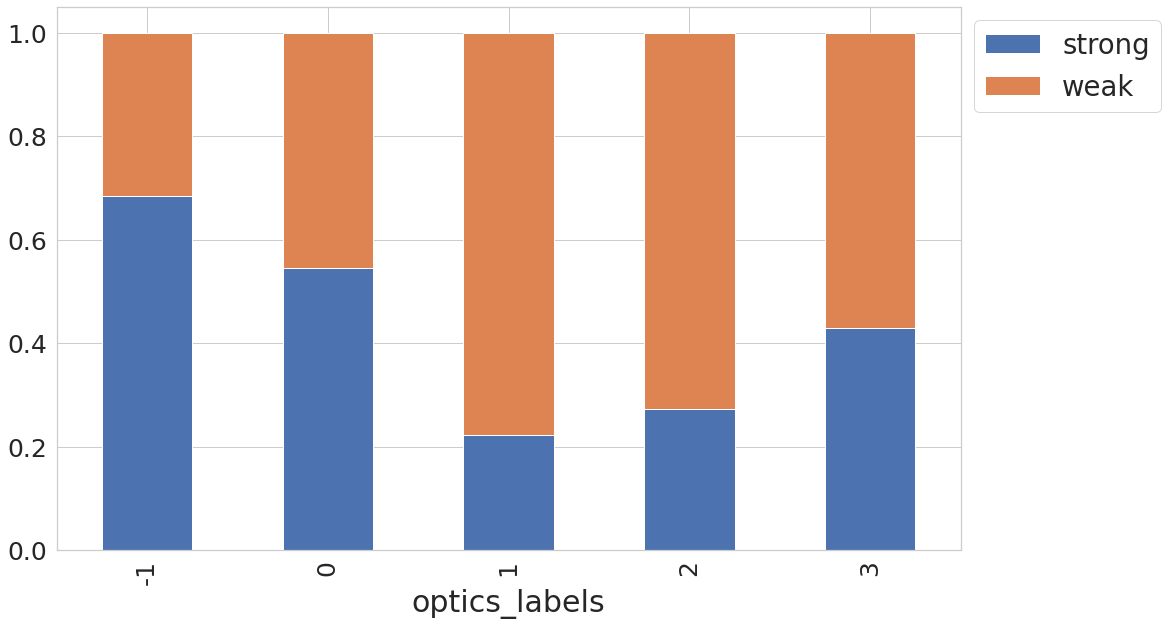

In [ ]:
bar_pl = y_emtype_emph_low.groupby(df_data_emph_low['optics_labels']).value_counts(normalize=True).unstack(1)

bar_pl[0:5].plot(kind='bar', stacked=True, edgecolor='white', fontsize=25, figsize=(16.2,10))
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("emtype_optics_emph_low.svg", format="svg")
plt.show()

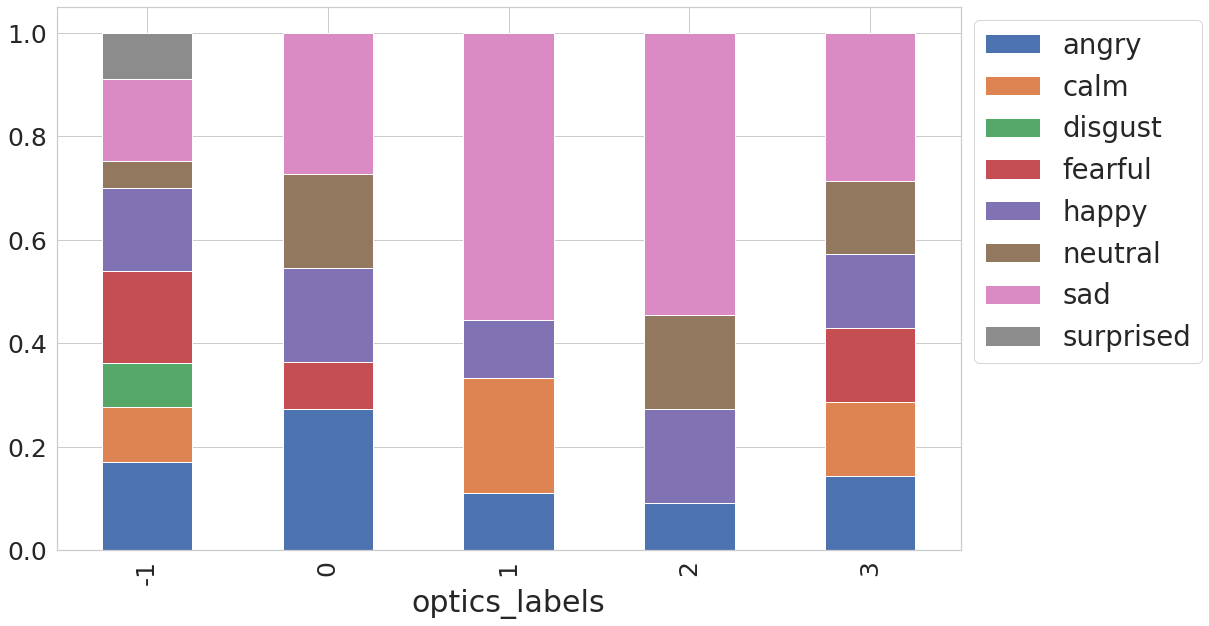

In [ ]:
bar_pl = y_emotion_emph_low.groupby(df_data_emph_low['optics_labels']).value_counts(normalize=True).unstack(1)
bar_pl[0:5].plot(kind='bar', stacked=True, edgecolor='white', fontsize=25, figsize=(16.2,10))

plt.legend(bbox_to_anchor=(1,1))
plt.savefig("emotions_optics_emph_low.svg", format="svg")
plt.show()